# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2020 = pd.read_csv('Datasets/flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.shape

(812153, 10)

In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [14]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [103]:
gby_pago19 = data_2019.groupby('forma_pago').agg({'cantidad_pasos':np.sum})

In [104]:
gby_pago19

,cantidad_pasos
forma_pago,
EFECTIVO,53621459
EXENTO,1310757
INFRACCION,1098472
NO COBRADO,6267683
T. DISCAPACIDAD,841695
TELEPASE,63570459


In [105]:
gby_pago17 = data_2017.groupby('forma_pago').agg({'cantidad_pasos':np.sum})
gby_pago17

,cantidad_pasos
forma_pago,
EFECTIVO,69502938
EXENTO,1677497
INFRACCION,629550
MONEDERO,16
NO COBRADO,4845670
Otros,22
TARJETA DISCAPACIDAD,1565099
TELEPASE,46612698


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [3]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
mask_telepase = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset_telepase = dataset[mask_telepase].copy()
dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [4]:

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [5]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [6]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_telepase.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [7]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [173]:
dataset.fecha.astype(np.datetime64)

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1372640   2017-12-31
1372641   2017-12-31
1372642   2017-12-31
1372643   2017-12-31
1372644   2017-12-31
Name: fecha, Length: 3560706, dtype: datetime64[ns]

In [8]:
dataset['fecha'] = dataset.fecha.astype(np.datetime64)

In [189]:
anio = dataset.fecha.dt.year
mes = dataset.fecha.dt.month

anio_mes = pd.DataFrame({'year': anio
                       ,'month': mes
                       ,'day': np.ones(len(anio))})

anio_mes = pd.to_datetime(anio_mes)
#anio_mes
dataset['primero_del_anio_mes'] = anio_mes

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1372640   2017-12-01
1372641   2017-12-01
1372642   2017-12-01
1372643   2017-12-01
1372644   2017-12-01
Length: 3560706, dtype: datetime64[ns]

In [192]:
dataset.groupby([])

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,anio_mes,primero_del_anio_mes
795843,2019,2019-12-24,14,15,Martes,Illia,Provincia,Liviano,INFRACCION,5,2019-12-01,2019-12-01
186111,2017,2017-02-19,15,16,Domingo,Avellaneda,Provincia,Pesado,EFECTIVO,4,2017-02-01,2017-02-01
1100189,2018,2018-10-20,23,0,Sábado,Avellaneda,Centro,Pesado,EFECTIVO,2,2018-10-01,2018-10-01
514870,2019,2019-08-26,16,17,Lunes,Dellepiane,Centro,Liviano,INFRACCION,18,2019-08-01,2019-08-01
201175,2019,2019-06-04,18,19,Martes,Alberti,Provincia,Liviano,INFRACCION,2,2019-06-01,2019-06-01


In [179]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : bool, defaul

In [166]:
dataset[dataset.estacion == 'Illia'].groupby(['fecha','forma_pago']).agg({'cantidad_pasos': np.sum }).reset_index()

,fecha,forma_pago,cantidad_pasos
0,2017-01-01,EFECTIVO,31183
1,2017-01-01,EXENTO,247
2,2017-01-01,INFRACCION,89
3,2017-01-01,MONEDERO,1
4,2017-01-01,NO COBRADO,1306
...,...,...,...
6546,2019-12-31,EXENTO,181
6547,2019-12-31,INFRACCION,242
6548,2019-12-31,NO COBRADO,751
6549,2019-12-31,T. DISCAPACIDAD,157


In [167]:
sns.lineplot

<module 'seaborn' from 'D:\\Alejo\\anaconda3_2020_02\\lib\\site-packages\\seaborn\\__init__.py'>

In [9]:
#Corregimos el nombre de fecha2 a fecha
dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_telepase.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [10]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [11]:
#Reordenamos el dataset por fecha
dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)
dataset_telepase

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,275,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,459,2017-01-01 00:00:00
...,...,...,...,...,...
204607,Martes,Provincia,Liviano,600,2019-12-31 22:00:00
204608,Martes,Centro,Liviano,630,2019-12-31 22:00:00
204609,Martes,Provincia,Liviano,110,2019-12-31 23:00:00
204610,Martes,Centro,Liviano,122,2019-12-31 23:00:00


### Resampleo (diario)

In [12]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [13]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_telepase = dataset_telepase.resample('D', on = 'fecha').sum()
print(diario_telepase.shape)
diario_telepase.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


In [14]:
diario = diario.reset_index()
diario.head()

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486


In [15]:
diario_telepase = diario_telepase.reset_index()
diario_telepase.head()

,fecha,cantidad_pasos
0,2017-01-01,12326
1,2017-01-02,35621
2,2017-01-03,39390
3,2017-01-04,40294
4,2017-01-05,41373


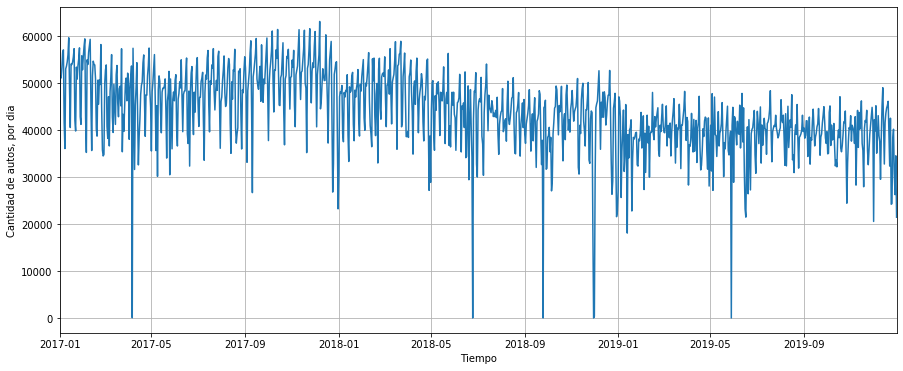

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim(np.datetime64('2017-01-01'),np.datetime64('2019-12-31'))
plt.grid()
plt.show()

In [160]:
diario[(diario.fecha.dt.year == 2019) & (diario.cantidad_pasos < 20000)]

,fecha,cantidad_pasos,dia_semana,dia_nombre,shift_7,media_7dias,media_14dias,media_21dias
742,2019-01-13,18076,6,Sunday,35546.0,37935.285714,35611.000000,36257.761905
878,2019-05-29,0,2,Wednesday,39861.0,39373.000000,38911.928571,38840.952381


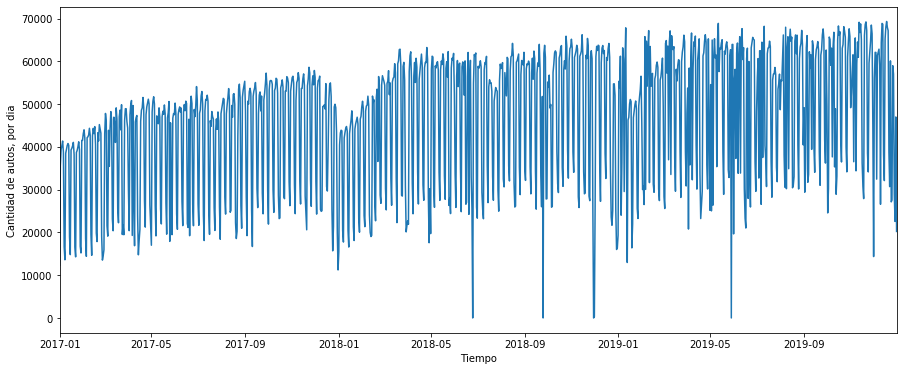

In [18]:
plt.figure(figsize = (15,6))
plt.plot(diario_telepase.fecha, diario_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.xlim(np.datetime64('2017-01-01'),np.datetime64('2019-12-31'))
plt.show()

### Exploracion basica

Como es la distribucion de cantidad_pasos cada dia de la semana? 

In [42]:
import seaborn as sns

In [66]:
diario.head()

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486


In [67]:
diario['dia_semana'] = diario.fecha.dt.dayofweek
diario['dia_nombre'] = diario.fecha.dt.day_name()
diario.head()

,fecha,cantidad_pasos,dia_semana,dia_nombre
0,2017-01-01,31183,6,Sunday
1,2017-01-02,51568,0,Monday
2,2017-01-03,51093,1,Tuesday
3,2017-01-04,53332,2,Wednesday
4,2017-01-05,56486,3,Thursday


In [68]:
# Una lista auxiliar para decirle a seaborn como quiero ordenar los boxplots que voy a hacer
day_order=list(diario[['dia_semana','dia_nombre']].\
               groupby(['dia_semana','dia_nombre']).size().\
               reset_index().dia_nombre
              )

In [69]:
day_order

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
data_outliers

In [20]:
diario = pd.merge(diario, data_outliers
                 ,how = 'left', left_on = 'fecha')

diario['pasos_prom'] = np.nan

diario.loc[diario.fecha.astype(str) == '2017-01-02', 'pasos_prom' ] = 907

diario.loc[~diario.pasos_prom.isna()]

diario[~diario.pasos_prom.isna()].pasos_prom

diario.loc[~diario.pasos_prom.isna(),'cantidad_pasos'] = diario[~diario.pasos_prom.isna()].pasos_prom

diario

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [37]:
#diario = diario.set_index('fecha')
diario.set_index('fecha', inplace = True)

In [38]:
diario

,cantidad_pasos,pasos_prom
fecha,,
2017-01-01,31183.0,NaN
2017-01-02,907.0,907.0
2017-01-03,543.0,543.0
2017-01-04,53332.0,NaN
2017-01-05,56486.0,NaN
...,...,...
2019-12-27,40182.0,NaN
2019-12-28,30681.0,NaN
2019-12-29,26259.0,NaN


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

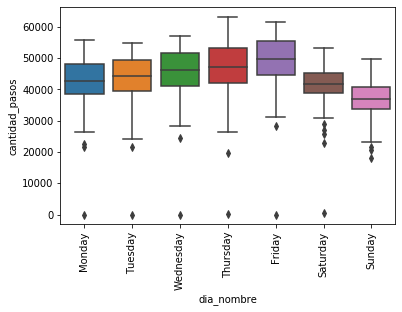

In [169]:
# Distribucion de la cantidad_pasos por dia de la semana
sns.boxplot(x = 'dia_nombre'
            , y = 'cantidad_pasos'
            , data = diario#[diario.fecha.dt.year == 2019]
           ,order = day_order)
plt.xticks(rotation=90)

In [97]:
diario

,cantidad_pasos,dia_semana,dia_nombre,shift_7,media_7dias,media_14dias,media_21dias
fecha,,,,,,,
2017-01-01,31183,6,Sunday,NaN,NaN,NaN,NaN
2017-01-02,51568,0,Monday,NaN,NaN,NaN,NaN
2017-01-03,51093,1,Tuesday,NaN,NaN,NaN,NaN
2017-01-04,53332,2,Wednesday,NaN,NaN,NaN,NaN
2017-01-05,56486,3,Thursday,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-27,40182,4,Friday,46128.0,35290.857143,38887.714286,38842.857143
2019-12-28,30681,5,Saturday,39303.0,34441.428571,38255.928571,38914.571429
2019-12-29,26259,6,Sunday,32337.0,33209.714286,37556.142857,38324.333333


### Tendencia y estacionalidad

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')

### Componentes - Efectivo

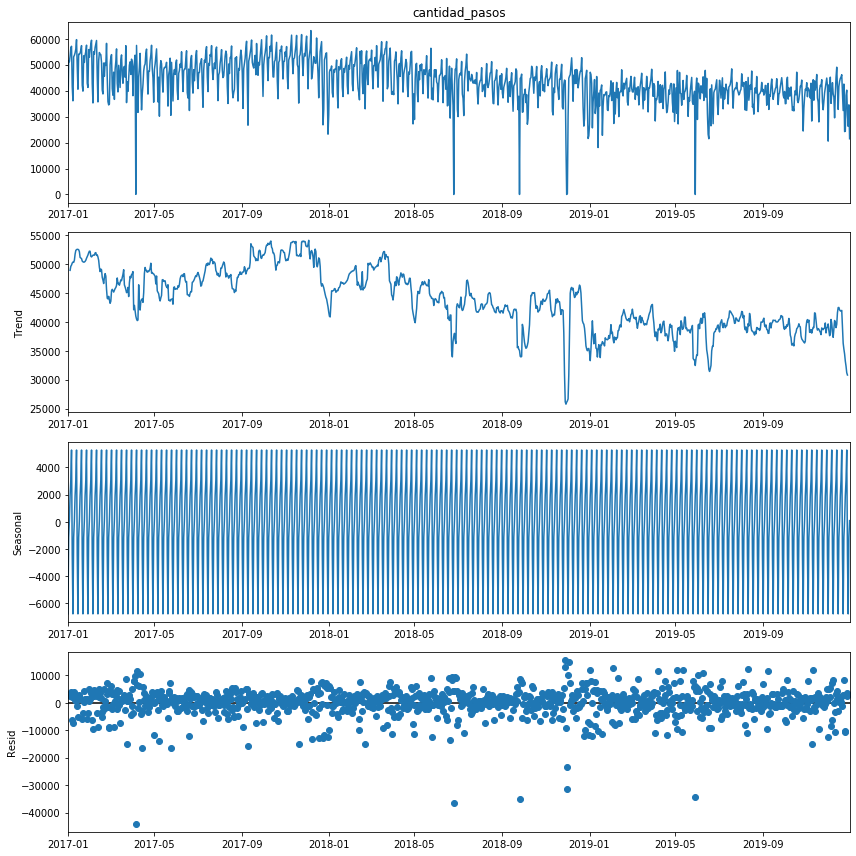

In [99]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [119]:
diario_telepase.set_index('fecha', inplace=True)
result_telepase = seasonal_decompose(diario_telepase.cantidad_pasos, model='additive')

### Componentes - Telepase

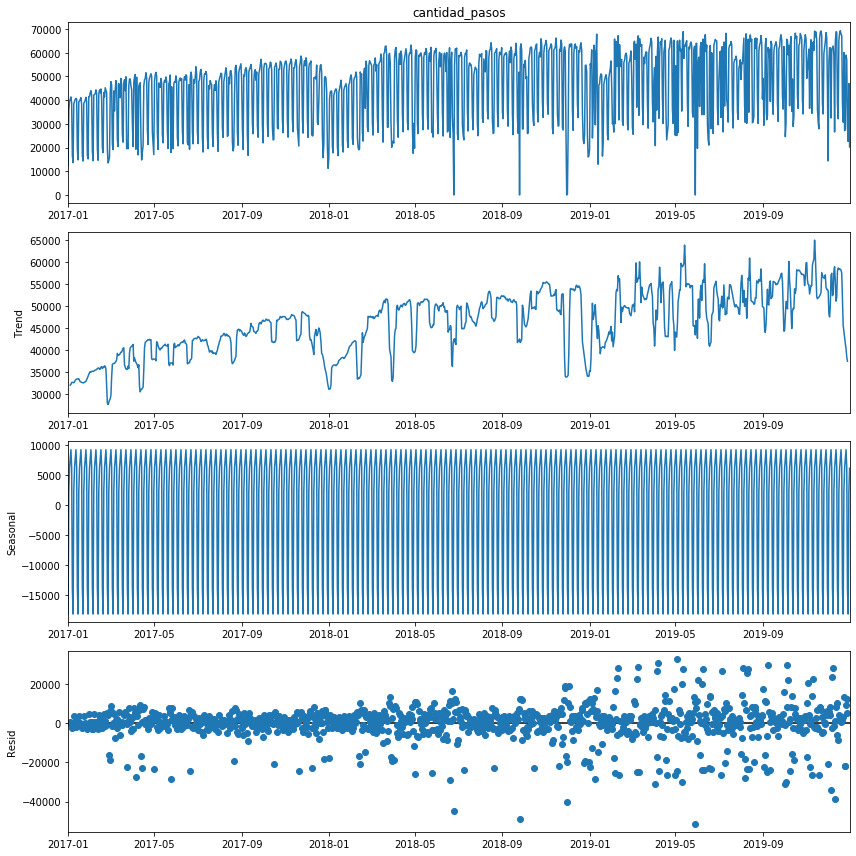

In [120]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result_telepase.plot()
plt.show()

### Diferencias sistematicas intra-mes? (Efectivo)

In [122]:
semanal = diario.resample('W', on = 'fecha').sum()
semanal

,cantidad_pasos,dia_semana,shift_7,media_7dias,media_14dias,media_21dias
fecha,,,,,,
2017-01-01,31183,6,0.0,0.000000,0.000000,0.000000
2017-01-08,347212,21,31183.0,48904.285714,0.000000,0.000000
2017-01-15,366413,21,347212.0,352547.285714,50304.428571,0.000000
2017-01-22,357215,21,366413.0,365635.571429,359091.428571,50581.857143
2017-01-29,354581,21,357215.0,353958.142857,359796.857143,357380.333333
...,...,...,...,...,...,...
2019-12-08,282891,21,266555.0,269633.571429,270683.071429,271150.190476
2019-12-15,272960,21,282891.0,274593.428571,272113.500000,271986.523810
2019-12-22,292881,21,272960.0,289078.857143,281836.142857,277768.619048


In [123]:
semanal.reset_index(inplace=True)
semanal.head()

,fecha,cantidad_pasos,dia_semana,shift_7,media_7dias,media_14dias,media_21dias
0,2017-01-01,31183,6,0.0,0.000000,0.000000,0.000000
1,2017-01-08,347212,21,31183.0,48904.285714,0.000000,0.000000
2,2017-01-15,366413,21,347212.0,352547.285714,50304.428571,0.000000
3,2017-01-22,357215,21,366413.0,365635.571429,359091.428571,50581.857143
4,2017-01-29,354581,21,357215.0,353958.142857,359796.857143,357380.333333


In [125]:
fecha = semanal.fecha.dt

In [130]:
fecha.weekofyear
fecha.we

0      52
1       1
2       2
3       3
4       4
       ..
153    49
154    50
155    51
156    52
157     1
Name: fecha, Length: 158, dtype: int64

In [131]:
semanal['semana'] = semanal.fecha.dt.weekofyear
semanal['mes'] = semanal.fecha.dt.month
semanal['anio'] = semanal.fecha.dt.year

In [136]:
semanal.drop([0, 157],inplace=True)

In [138]:
semanal.reset_index(drop=True, inplace=True)

In [140]:
semanal_gby = semanal.groupby(['anio','mes'])

In [145]:
semanal['semana_del_mes'] = semanal_gby.semana.rank().astype(int)

In [146]:
semanal.head(16)

,fecha,cantidad_pasos,dia_semana,shift_7,media_7dias,media_14dias,media_21dias,semana,mes,anio,semana_del_mes
0,2017-01-08,347212,21,31183.0,48904.285714,0.000000,0.000000,1,1,2017,1
1,2017-01-15,366413,21,347212.0,352547.285714,50304.428571,0.000000,2,1,2017,2
2,2017-01-22,357215,21,366413.0,365635.571429,359091.428571,50581.857143,3,1,2017,3
3,2017-01-29,354581,21,357215.0,353958.142857,359796.857143,357380.333333,4,1,2017,4
4,2017-02-05,359401,21,354581.0,360858.285714,357408.214286,360150.666667,5,2,2017,1
5,2017-02-12,363774,21,359401.0,360449.428571,360653.857143,358421.952381,6,2,2017,2
6,2017-02-19,343877,21,363774.0,354979.714286,357714.571429,358762.476190,7,2,2017,3
7,2017-02-26,335395,21,343877.0,335655.857143,345317.785714,350361.666667,8,2,2017,4
8,2017-03-05,304908,21,335395.0,312964.571429,324310.214286,334533.380952,9,3,2017,1
9,2017-03-12,321494,21,304908.0,316265.428571,314615.000000,321628.619048,10,3,2017,2


In [149]:
diff_4_vs_1ra_semana = semanal[semanal.semana_del_mes.isin([1,4])].copy()\
                                .sort_values(by = ['anio','mes','semana_del_mes'])\
                                .groupby(['anio','mes'])['cantidad_pasos'].diff()

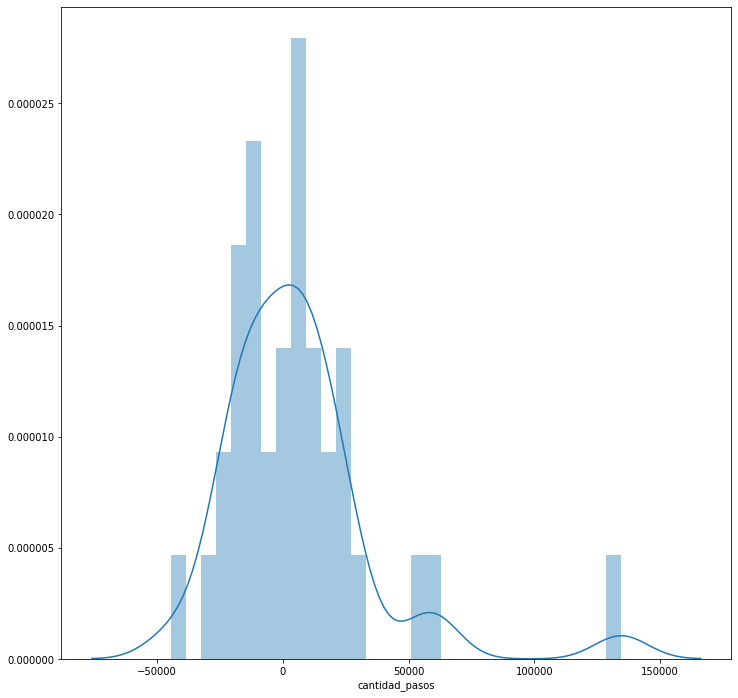

In [154]:
import seaborn as sns
sns.distplot(diff_4_vs_1ra_semana.dropna(), 30)

In [ ]:
plt.plot()

#### Posible modelo benchmark: predecir la misma cantidad de pasos que el mismo dia de la semana anterior

In [9]:
from sklearn.metrics import mean_squared_error

In [70]:
diario['shift_7'] = diario.cantidad_pasos.shift(periods = 7)

In [73]:
# Para el domingo 8/1/2017 predigo el mismo valor que para el domingo 1/1/2017
diario.head(10)

,fecha,cantidad_pasos,dia_semana,dia_nombre,shift_7
0,2017-01-01,31183,6,Sunday,NaN
1,2017-01-02,51568,0,Monday,NaN
2,2017-01-03,51093,1,Tuesday,NaN
3,2017-01-04,53332,2,Wednesday,NaN
4,2017-01-05,56486,3,Thursday,NaN
5,2017-01-06,57081,4,Friday,NaN
6,2017-01-07,41587,5,Saturday,NaN
7,2017-01-08,36065,6,Sunday,31183.0
8,2017-01-09,53036,0,Monday,51568.0
9,2017-01-10,53601,1,Tuesday,51093.0


In [74]:
# A veces me resulta comodo tener la fecha como index del dataframe
diario.set_index('fecha',inplace=True)
diario.head()

,cantidad_pasos,dia_semana,dia_nombre,shift_7
fecha,,,,
2017-01-01,31183,6,Sunday,NaN
2017-01-02,51568,0,Monday,NaN
2017-01-03,51093,1,Tuesday,NaN
2017-01-04,53332,2,Wednesday,NaN
2017-01-05,56486,3,Thursday,NaN


In [75]:
# Cuando el index del dataframe es la fecha, se puede aislar 
# el cuarto trimestre de 2019 con una sintaxis muy sencilla:
diario['2019-10':'2019-12'].head()#.tail()

,cantidad_pasos,dia_semana,dia_nombre,shift_7
fecha,,,,
2019-10-01,39669,1,Tuesday,39191.0
2019-10-02,34943,2,Wednesday,41486.0
2019-10-03,35054,3,Thursday,43110.0
2019-10-04,43775,4,Friday,44985.0
2019-10-05,45150,5,Saturday,41925.0


In [76]:
diario['2019-10':'2019-12'].shape # 92 dias

(92, 4)

In [77]:
rmse_benchmark = np.sqrt(mean_squared_error(diario['2019-10':'2019-12'].cantidad_pasos
                                            ,diario['2019-10':'2019-12'].shift_7))
rmse_benchmark

6949.663393475162

In [78]:
# indices del 4to trimestre
test_ind = pd.date_range('2019-10-01','2019-12-31')

In [98]:
test_ind[:10]

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10'],
              dtype='datetime64[ns]', freq='D')

In [79]:
# otra sintaxis para aislar el 4to trimestre: con .loc
rmse_benchmark = np.sqrt(mean_squared_error(diario.loc[test_ind].cantidad_pasos
                                            ,diario.loc[test_ind].shift_7))
rmse_benchmark

6949.663393475162

### Multi-step del shift de 7 dias, para Octubre, Noviembre y Diciembre de 2019.

Algo que explicamos en clase, y es clave para hacer una prediccion multi-step con este modelo. Si aplicamos la estrategia recursiva con este modelo benchmark, la prediccion que hacemos a futuro consiste en predecir que todas las semanas siguientes a la semana del 24/9-30/9 van a ser iguales a esa semana. 

En lo que sigue, explico paso a paso como concatenar varias copias de esa semana para hacer una prediccion para todo el trimestre.

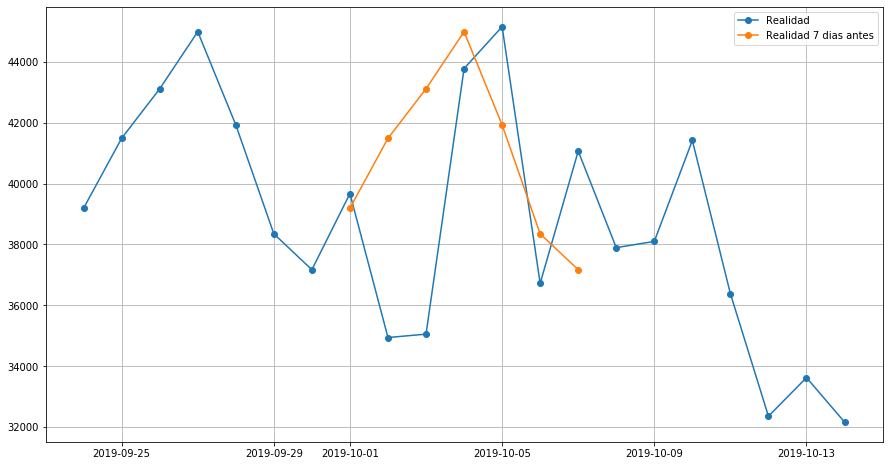

In [119]:
plt.figure(figsize=(15,8))
plt.plot(diario['2019-09-24':'2019-10-14'].index
         ,diario['2019-09-24':'2019-10-14'].cantidad_pasos,'-o',label='Realidad')

plt.plot(diario['2019-10-01':'2019-10-07'].index
         ,diario['2019-10-01':'2019-10-07'].shift_7,'-o',label='Realidad 7 dias antes')
plt.legend()
plt.grid()

In [176]:
diario['2019-09-24':'2019-09-30']

,cantidad_pasos,dia_semana,dia_nombre,shift_7
fecha,,,,
2019-09-24,39191,1,Tuesday,39293.0
2019-09-25,41486,2,Wednesday,40707.0
2019-09-26,43110,3,Thursday,41326.0
2019-09-27,44985,4,Friday,44596.0
2019-09-28,41925,5,Saturday,40820.0
2019-09-29,38348,6,Sunday,34646.0
2019-09-30,37170,0,Monday,38523.0


In [178]:
# Cuantas semanas hay en el tercer trimestre? 13
len(test_ind)/7

13.142857142857142

In [179]:
# 13 semanas... y UN dia, que es el resto de la division de 92 por 7
len(test_ind) % 7

1

In [180]:
len(test_ind)

92

In [181]:
13*7+1

92

In [81]:
semana_replicada = diario['2019-09-24':'2019-09-30']

In [82]:
semana_replicada

,cantidad_pasos,dia_semana,dia_nombre,shift_7
fecha,,,,
2019-09-24,39191,1,Tuesday,39293.0
2019-09-25,41486,2,Wednesday,40707.0
2019-09-26,43110,3,Thursday,41326.0
2019-09-27,44985,4,Friday,44596.0
2019-09-28,41925,5,Saturday,40820.0
2019-09-29,38348,6,Sunday,34646.0
2019-09-30,37170,0,Monday,38523.0


In [83]:
sr_columna = semana_replicada.cantidad_pasos.values.reshape(-1,1)
sr_columna

array([[39191],
       [41486],
       [43110],
       [44985],
       [41925],
       [38348],
       [37170]], dtype=int64)

In [84]:
sr_columna.shape

(7, 1)

In [85]:
# Ejemplo: trato de concatenar 3 copias de la misma semana
n_repeticiones = 3
np.repeat(sr_columna
          ,n_repeticiones
          ,axis=1)

array([[39191, 39191, 39191],
       [41486, 41486, 41486],
       [43110, 43110, 43110],
       [44985, 44985, 44985],
       [41925, 41925, 41925],
       [38348, 38348, 38348],
       [37170, 37170, 37170]], dtype=int64)

In [86]:
# con reshape asi nomas no funciona:
# estamos prediciendo el primer dia de la semana tres veces,
# despues el segundo dia tres veces, etc
n_repeticiones = 3
np.repeat(sr_columna
          ,n_repeticiones
          ,axis=1).reshape((-1,1)) 

array([[39191],
       [39191],
       [39191],
       [41486],
       [41486],
       [41486],
       [43110],
       [43110],
       [43110],
       [44985],
       [44985],
       [44985],
       [41925],
       [41925],
       [41925],
       [38348],
       [38348],
       [38348],
       [37170],
       [37170],
       [37170]], dtype=int64)

In [87]:
# Ahora si: predecimos el primero, luego el segundo.. el septimo, y de nuevo el primero, el segundo, etc.
n_repeticiones = 3
np.repeat(sr_columna
          ,n_repeticiones
          ,axis=1).reshape((-1,1), order = 'F')

array([[39191],
       [41486],
       [43110],
       [44985],
       [41925],
       [38348],
       [37170],
       [39191],
       [41486],
       [43110],
       [44985],
       [41925],
       [38348],
       [37170],
       [39191],
       [41486],
       [43110],
       [44985],
       [41925],
       [38348],
       [37170]], dtype=int64)

In [88]:
# Pero son 13 semanas:
n_repeticiones = 13
semana_rep13 = np.repeat(sr_columna
                         ,n_repeticiones
                         ,axis=1).reshape((-1,1),order='F')

In [89]:
benchmark7dias_pred = np.concatenate((semana_rep13
                                      ,sr_columna[0].reshape(1,1)) # le agrego el primer dia de la semana
                                    ,axis=0)

In [90]:
benchmark7dias_pred.shape

(92, 1)

In [91]:
diario['2019-10':'2019-12'].shape

(92, 4)

In [92]:
rmse = np.sqrt(mean_squared_error(diario['2019-10':'2019-12'].cantidad_pasos.values
                                  , benchmark7dias_pred)
              )

In [93]:
rmse

5914.692661720362

### Un modelo un poco mas sofisticado

Intento crear features que le sirvan a un modelo un poco mas sofisticado. Para cada dia, hago una(s) cuentas que me dan cierta informacion de lo que paso' recientemente con la cantidad de pasos. La esperanza es que haya algun tipo de relacion entre esa informacion resumida y lo que va a pasar el dia siguiente. Despues, sera' el modelo que usemos, cualquiera que sea, el que decidad que' features son utiles para predecir y cómo combinarlas.

In [94]:
diario['media_7dias'] = diario.cantidad_pasos.rolling(7,center=False).mean()
diario['media_14dias'] = diario.cantidad_pasos.rolling(14,center=False).mean()
diario['media_21dias'] = diario.cantidad_pasos.rolling(21,center=False).mean()

In [95]:
diario.head(23)

,cantidad_pasos,dia_semana,dia_nombre,shift_7,media_7dias,media_14dias,media_21dias
fecha,,,,,,,
2017-01-01,31183,6,Sunday,NaN,NaN,NaN,NaN
2017-01-02,51568,0,Monday,NaN,NaN,NaN,NaN
2017-01-03,51093,1,Tuesday,NaN,NaN,NaN,NaN
2017-01-04,53332,2,Wednesday,NaN,NaN,NaN,NaN
2017-01-05,56486,3,Thursday,NaN,NaN,NaN,NaN
2017-01-06,57081,4,Friday,NaN,NaN,NaN,NaN
2017-01-07,41587,5,Saturday,NaN,48904.285714,NaN,NaN
2017-01-08,36065,6,Sunday,31183.0,49601.714286,NaN,NaN
2017-01-09,53036,0,Monday,51568.0,49811.428571,NaN,NaN


In [96]:
diario['media_7dias'] = diario.media_7dias.shift(periods=1)
diario['media_14dias'] = diario.media_14dias.shift(periods=1)
diario['media_21dias'] = diario.media_21dias.shift(periods=1)

In [196]:
diario.head(23)

,cantidad_pasos,dia_semana,dia_nombre,shift_7,media_7dias,media_14dias,media_21dias
fecha,,,,,,,
2017-01-01,31183,6,Sunday,NaN,NaN,NaN,NaN
2017-01-02,51568,0,Monday,NaN,NaN,NaN,NaN
2017-01-03,51093,1,Tuesday,NaN,NaN,NaN,NaN
2017-01-04,53332,2,Wednesday,NaN,NaN,NaN,NaN
2017-01-05,56486,3,Thursday,NaN,NaN,NaN,NaN
2017-01-06,57081,4,Friday,NaN,NaN,NaN,NaN
2017-01-07,41587,5,Saturday,NaN,NaN,NaN,NaN
2017-01-08,36065,6,Sunday,31183.0,48904.285714,NaN,NaN
2017-01-09,53036,0,Monday,51568.0,49601.714286,NaN,NaN


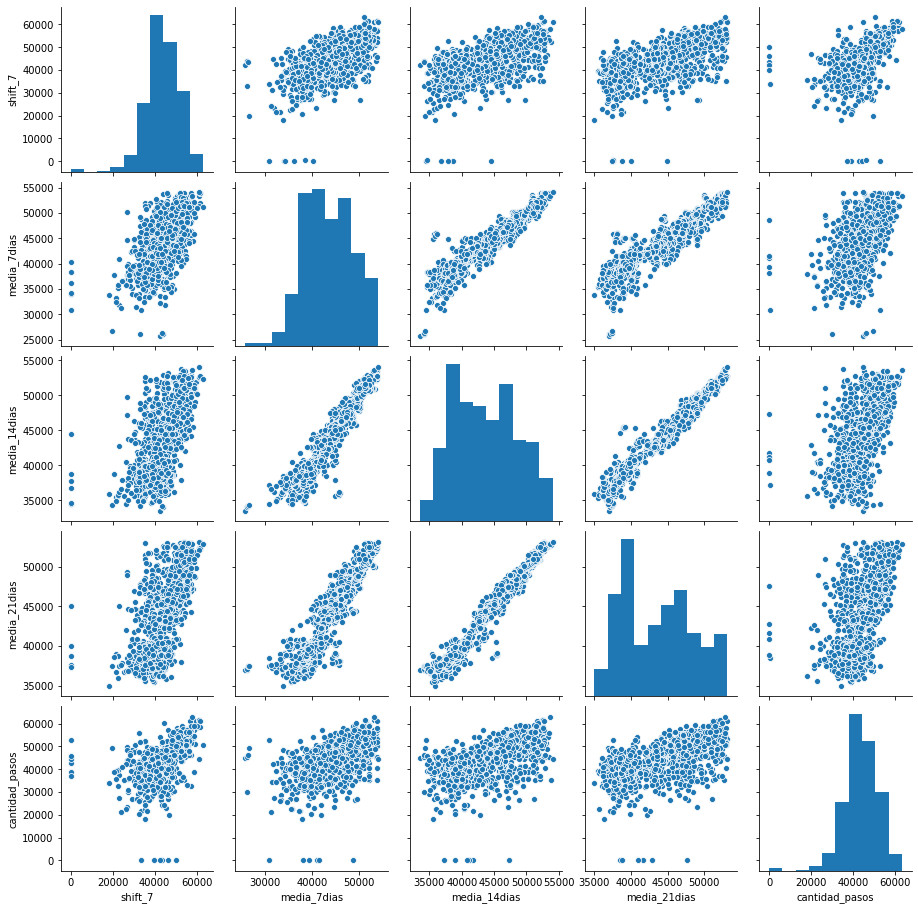

In [152]:
# Haciendo un pairplot, podemos ver que hay cierta correlacion entre las medias calculadas y la cantidad_pasos 
# (es decir, los pasos el dia siguiente)
sns.pairplot(diario['2017-02':][['shift_7', 'media_7dias',
       'media_14dias', 'media_21dias','cantidad_pasos']])

In [157]:
diario['2017-02':][['shift_7', 'media_7dias',
       'media_14dias', 'media_21dias','cantidad_pasos']].corr()

,shift_7,media_7dias,media_14dias,media_21dias,cantidad_pasos
shift_7,1.000000,0.624274,0.607902,0.590954,0.554849
media_7dias,0.624274,1.000000,0.945624,0.912673,0.529500
media_14dias,0.607902,0.945624,1.000000,0.976921,0.533139
media_21dias,0.590954,0.912673,0.976921,1.000000,0.530192
cantidad_pasos,0.554849,0.529500,0.533139,0.530192,1.000000


In [27]:
diario[:'2017-01-07'].cantidad_pasos.mean()

48904.28571428572

In [39]:
diario['2017-02-01':].head(30)

,cantidad_pasos,shift_7,media_7dias,media_14dias,media_21dias
fecha,,,,,
2017-02-01,55616,53657.0,51561.714286,50971.357143,51491.476190
2017-02-02,57795,55105.0,51946.000000,51131.857143,51574.952381
2017-02-03,59423,57506.0,52219.857143,51280.857143,51564.095238
2017-02-04,42667,42831.0,52196.428571,51324.428571,51261.857143
2017-02-05,35244,41218.0,51343.000000,50998.714286,51009.380952
2017-02-06,54963,55814.0,51221.428571,51109.714286,51052.333333
2017-02-07,53979,52842.0,51383.857143,51332.857143,51054.190476
2017-02-08,56618,55616.0,51527.000000,51544.357143,51156.571429
2017-02-09,57882,57795.0,51539.428571,51742.714286,51267.714286


In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rf = RandomForestRegressor()
rf.fit(diario['2017-02-01':'2019-09-30'][['shift_7'
                                         , 'media_7dias'
                                         , 'media_14dias'
                                         ,'media_21dias']]
      ,diario['2017-02-01':'2019-09-30'].cantidad_pasos)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [160]:
y_pred = rf.predict(diario['2019-10-01':][['shift_7'
                                         , 'media_7dias'
                                         , 'media_14dias'
                                         ,'media_21dias']])

In [161]:
np.sqrt(mean_squared_error(diario['2019-10-01':].cantidad_pasos,y_pred))

5800.713152530303

In [11]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


### Prueba Prophet

In [36]:
diario

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [12]:
from fbprophet import Prophet

diario.reset_index(inplace=True)

diario.rename(columns={'fecha':'ds','cantidad_pasos':'y'}, inplace=True)

diario_train = diario[diario.ds <= '2019-09-30']
diario_test = diario[diario.ds > '2019-09-30']

model = Prophet()
model.fit(diario_train)

ultimo_trimestre = diario_test[['ds']]
ultimo_trimestre_pred = model.predict(ultimo_trimestre)

rmse_prophet = np.sqrt(mean_squared_error(diario_test.y, ultimo_trimestre_pred.yhat))

In [27]:
rmse_prophet

5870.596421216688

(30000, 50000)

<Figure size 1440x1080 with 0 Axes>

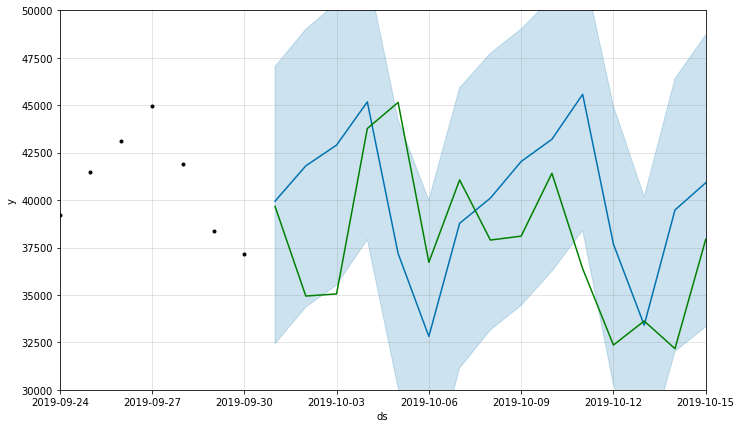

In [56]:
plt.figure(figsize=(20, 15))
model.plot(ultimo_trimestre_pred)
plt.plot(diario_test.ds, diario_test.y, c='g')
plt.xlim(np.datetime64('2019-09-24'),np.datetime64('2019-10-15'))
plt.ylim(30000,50000)

In [38]:
# Codigo de Flor Blanco
prop = Prophet(yearly_seasonality=True)
prop.fit(diario_train)
predic = prop.make_future_dataframe(periods=91, freq='D')
forecast = prop.predict(predic)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Alejo\anaconda3_2020_02\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1089,2019-12-26,41895.879896,34577.863453,48675.382235
1090,2019-12-27,43857.783187,36757.416698,51121.776356
1091,2019-12-28,35553.133406,28656.517111,42815.716881
1092,2019-12-29,30868.796103,23717.177844,38354.445457
1093,2019-12-30,36531.509819,29507.592431,43372.915084


In [40]:
metric_df = forecast.set_index('ds')[['yhat']].join(diario.set_index('ds').y).reset_index()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'RMSE: {np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))}')

RMSE: 5697.626742159508


In [57]:
from fbprophet.diagnostics import cross_validation

In [59]:
df_cv = cross_validation(model, initial='365 days', period='91 days', horizon = '182 days')


INFO:fbprophet:Making 6 forecasts with cutoffs between 2018-01-01 00:00:00 and 2019-04-01 00:00:00
D:\Alejo\anaconda3_2020_02\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [62]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-02,41517.833960,35423.970116,47303.217219,47130,2018-01-01
1,2018-01-03,44378.200020,37934.101374,50922.064234,48162,2018-01-01
2,2018-01-04,44542.121702,38233.623809,50043.835050,47953,2018-01-01
3,2018-01-05,47394.917712,41274.470028,53238.761680,49505,2018-01-01
4,2018-01-06,37341.683775,31219.905566,43439.714443,39235,2018-01-01
...,...,...,...,...,...,...
1087,2019-09-26,35487.720020,28439.927543,42624.963072,43110,2019-04-01
1088,2019-09-27,37918.419572,30817.126393,44847.696185,44985,2019-04-01
1089,2019-09-28,28814.891776,21592.036041,35540.724584,41925,2019-04-01
1090,2019-09-29,23940.039438,16695.881340,31282.472092,38348,2019-04-01


In [58]:
help(cross_validation)

Help on function cross_validation in module fbprophet.diagnostics:

cross_validation(model, horizon, period=None, initial=None)
    Cross-Validation for time series.
    
    Computes forecasts from historical cutoff points. Beginning from
    (end - horizon), works backwards making cutoffs with a spacing of period
    until initial is reached.
    
    When period is equal to the time interval of the data, this is the
    technique described in https://robjhyndman.com/hyndsight/tscv/ .
    
    Parameters
    ----------
    model: Prophet class object. Fitted Prophet model
    horizon: string with pd.Timedelta compatible style, e.g., '5 days',
        '3 hours', '10 seconds'.
    period: string with pd.Timedelta compatible style. Simulated forecast will
        be done at every this period. If not provided, 0.5 * horizon is used.
    initial: string with pd.Timedelta compatible style. The first training
        period will begin here. If not provided, 3 * horizon is used.
    
    Ret